In [51]:
from sklearn.datasets import make_blobs,make_circles, make_moons,make_classification
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

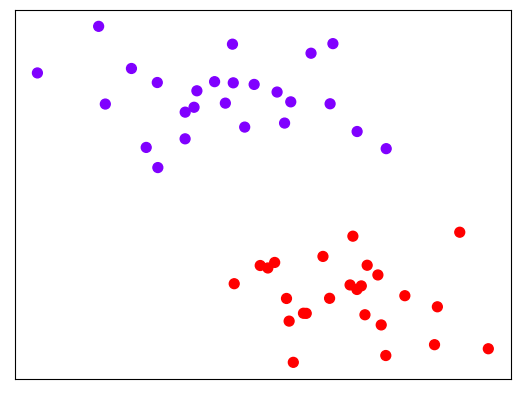

In [2]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

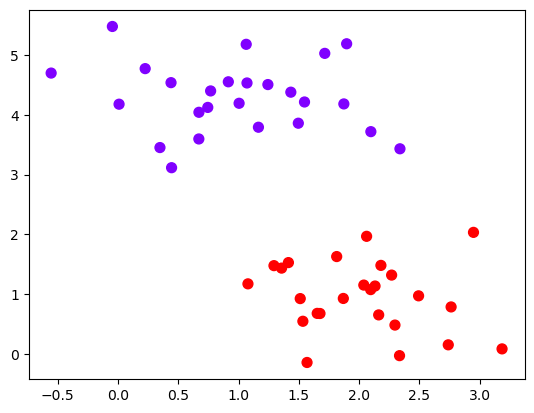

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()

In [12]:
#get max min on two axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#split to 30 units on each axis
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
#change to grid
axisy,axisx = np.meshgrid(axisy,axisx)
#change to 900 points
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
xy.shape

(900, 2)

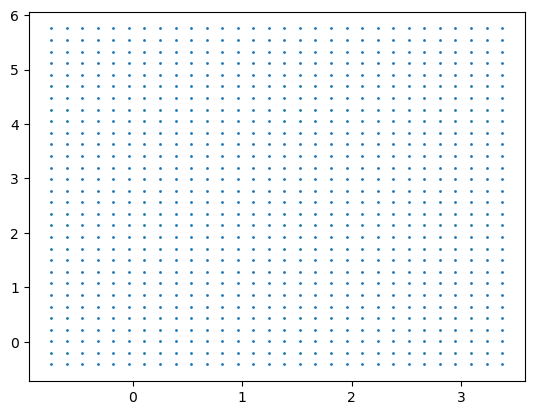

In [14]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap = 'rainbow')

In [13]:
a = np.array([1,2,3])
b = np.array([7,8])
v1,v2 = np.meshgrid(a,b)
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [5]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [16]:
v = np.vstack([v1.ravel(), v2.ravel()]).T
v

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

(-0.41872382476349596, 5.754870487889891)

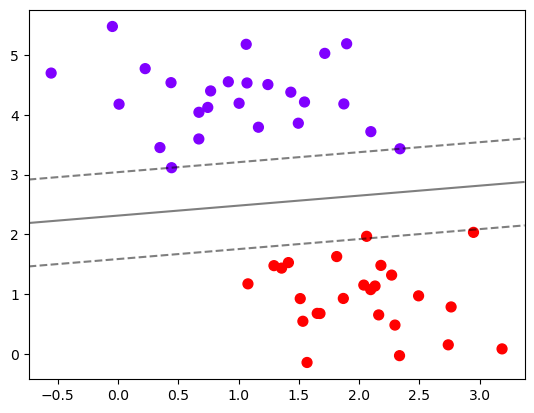

In [22]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
#calculate decision boundary
clf = SVC(kernel = "linear").fit(X,y)
#get distance from each points to decision boundary
P = clf.decision_function(xy).reshape(axisx.shape)
ax.contour(axisx,axisy,P
            ,colors="k"
            ,levels=[-1,0,1]
            ,alpha=0.5
            ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [23]:
#find a specific point
X[10]

array([1.71444449, 5.02521524])

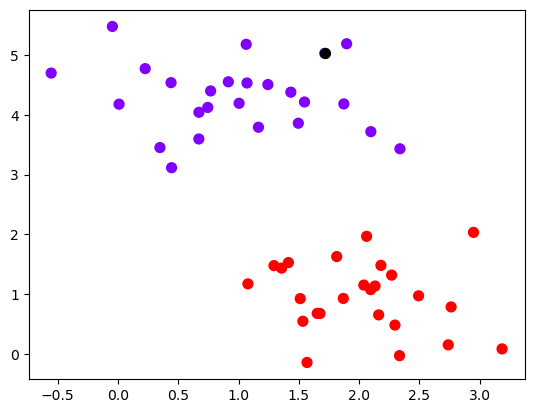

In [24]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c='black',s=50,cmap="rainbow")

In [33]:
d10 = clf.decision_function(X[10].reshape(1,-1))
d10

array([-3.33917354])

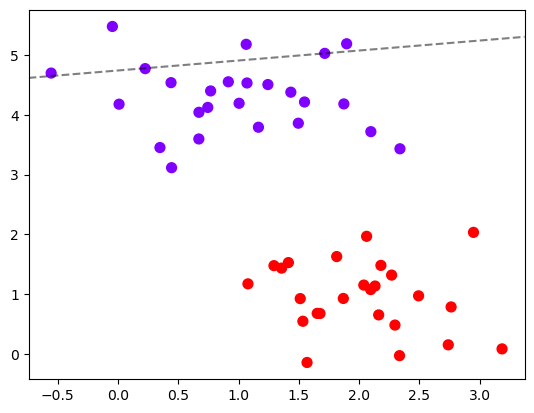

In [34]:
# plot a line have same distance to db as point 10
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,P
            ,colors="k"
            ,levels=[d10]
            ,alpha=0.5
            ,linestyles=["--"])

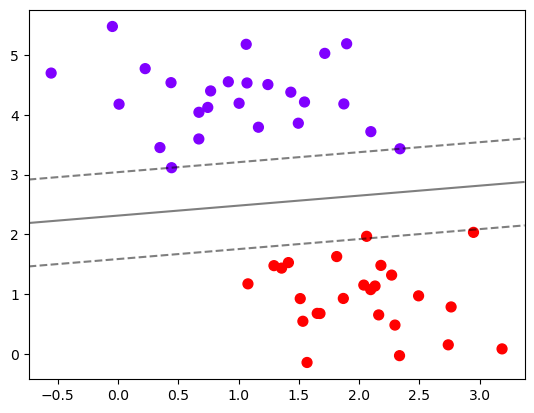

In [10]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [35]:
clf.predict(X)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [36]:
clf.support_vectors_ 

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [38]:
clf.n_support_

array([2, 1])

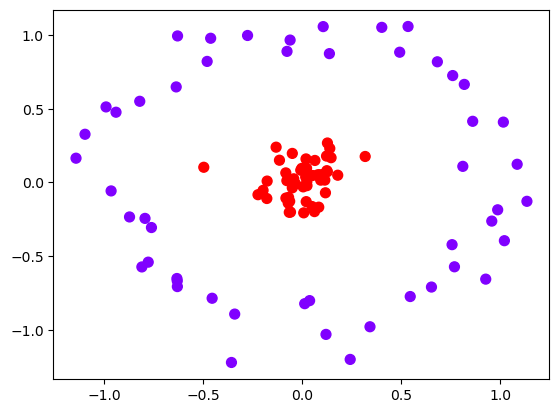

In [40]:
#circles
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()

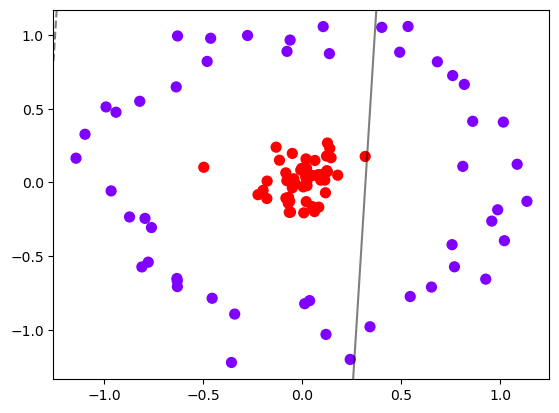

In [41]:
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

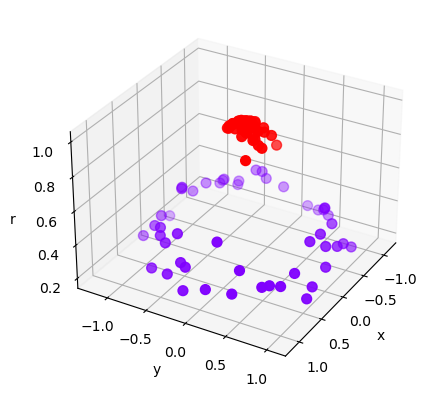

In [43]:
#new dimension r
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),100)
from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
plot_3D()

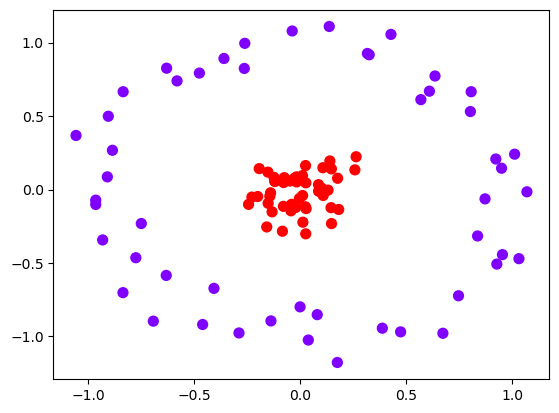

In [44]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")


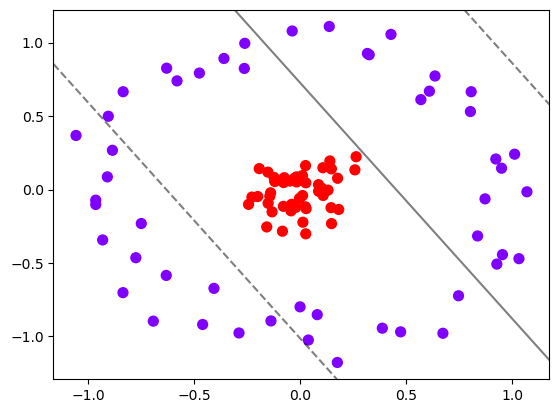

In [45]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [48]:
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),100)
from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

In [49]:
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30), value=30), IntSlider(value=30, de…

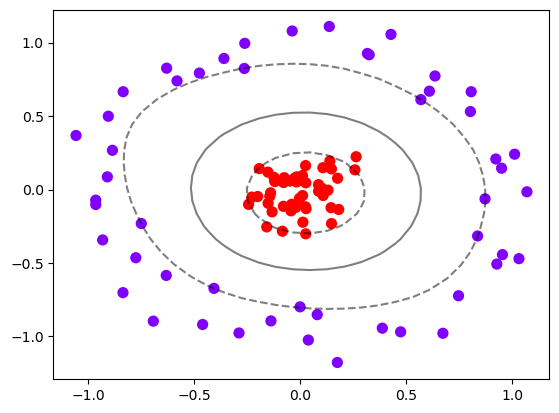

In [50]:
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

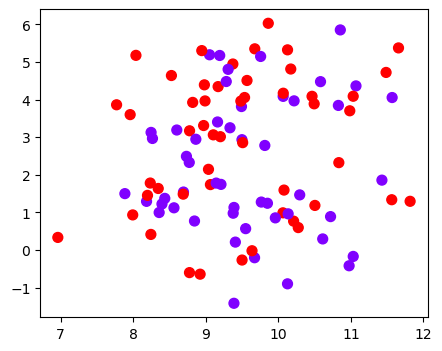

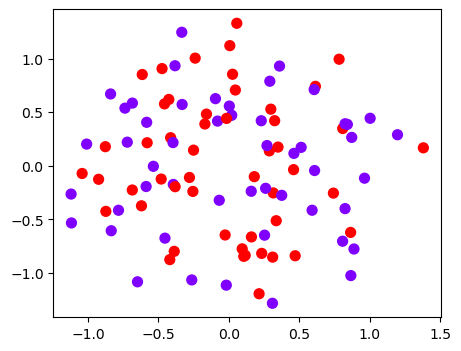

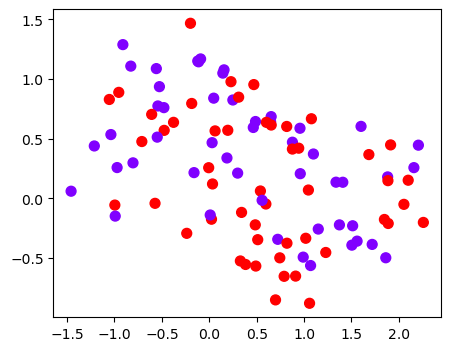

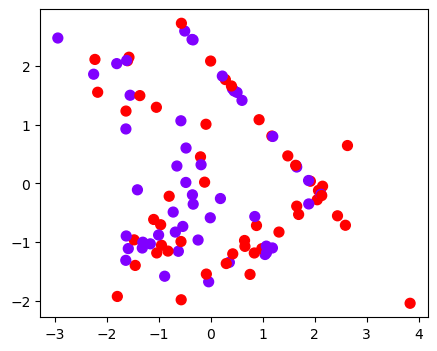

In [53]:
n_samples =100
datasets = [make_blobs(n_samples = n_samples, centers = 2, random_state = 4)
            ,make_circles(n_samples = n_samples, noise = 0.2, factor = 0.5, random_state = 5)
            ,make_moons(n_samples = n_samples, noise = 0.2, random_state = 6)
            ,make_classification(n_samples = n_samples, n_features = 2, n_informative = 2,n_redundant=0)
           ]

Kernel = ['linear','poly','rbf','sigmoid']
for X,Y in datasets:
    plt.figure(figsize = (5,4))
    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

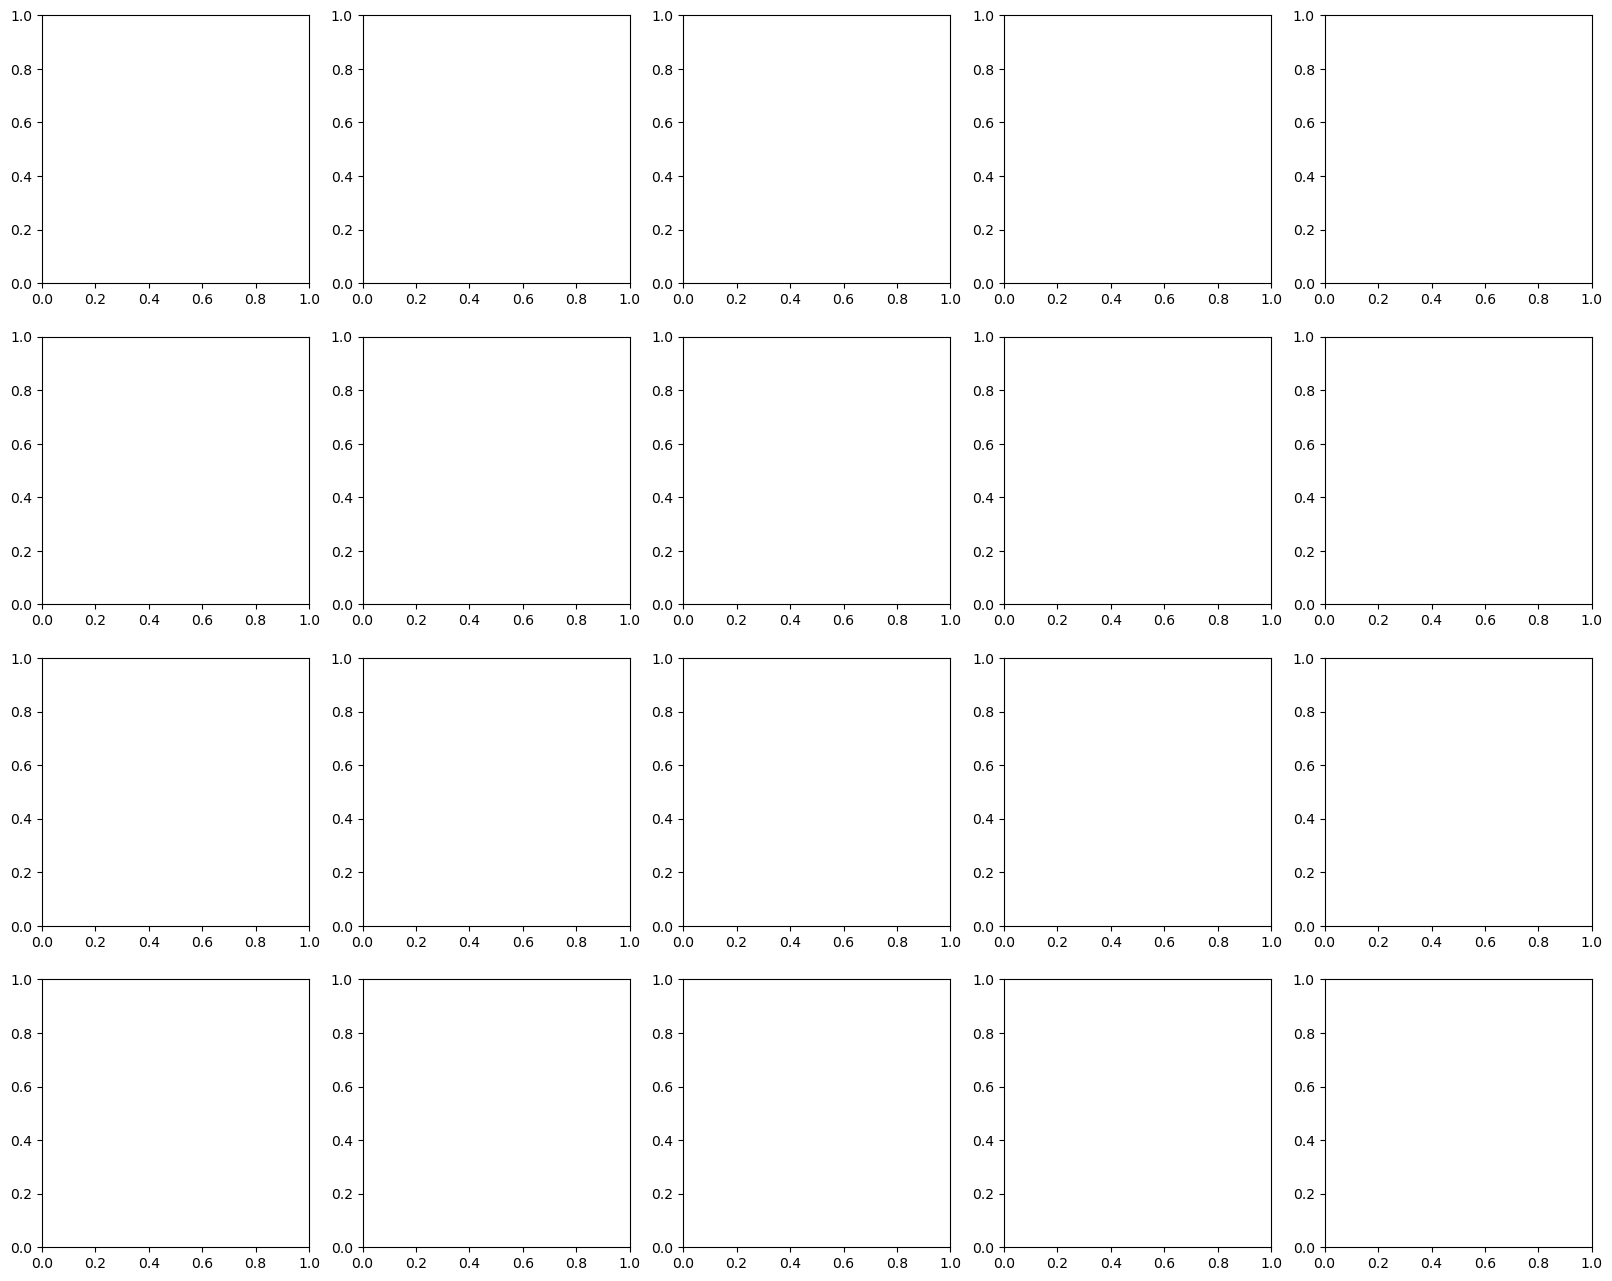

In [54]:
nrows = len(datasets)
ncols = len(Kernel)+1
fig,axes = plt.subplots(nrows,ncols,figsize=(20,16))
